In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import random
import math
from fractions import Fraction

* **df.sample(frac=0.2, random_state=99):** samples randomly 20% of the data df or use n=1000

# **Random Number Generators**

In [ ]:
range(5), range(5, 12)

(range(0, 5), range(5, 12))

In [ ]:
x=20
not np.any([x%i == 0 for i in range(2, x)]) # if x is a prime number

False

In [ ]:
np.arange(0, 12, 3) # a sequence starting from 0 to 12 (exclusive) with increment of 3

array([0, 3, 6, 9])

In [ ]:
np.arange(0, 12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
np.linspace(0, 3, 9)  # evenly divide [0,3] into 8 subintervals

array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ])

In [ ]:
np.random.seed(0)  # seed for reproducibility
x1 = np.random.random(5)  # one-dimensional array of random numbers from a uniform distribution on [0,1]
x2 = np.random.normal(10, 2, (3, 4))  # two-dimensional array of random numbers from a normal distribution with mean=10 and standard deviation=2
x3 = np.random.randint(0, 10, (3, 4, 5))  # three-dimensional array of random integers in the interval [0, 10)

In [ ]:
print(x1)
np.random.choice(x1, 5) # choosing a length 5 array from x1 with replacement

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


array([0.4236548 , 0.60276338, 0.5488135 , 0.54488318, 0.60276338])

In [ ]:
np.random.choice(range(10),10)

array([0, 7, 5, 9, 0, 2, 7, 2, 9, 2])

In [ ]:
a = random.choice(range(10),10) # same as above
a.sum(), sum(a)

(32, 32)

In [ ]:
a = [random.choice(range(10)) for i in range(10)]  # same as above
a

[6, 8, 2, 3, 0, 0, 6, 0, 6, 3]

In [ ]:
sum(random.choice(range(10)) for i in range(10))  # same as above

50

In [ ]:
print(x3)
x4 = x3[1:, 0:2, 1:4].copy()
x4

[[[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]

 [[4 3 4 4 8]
  [4 3 7 5 5]
  [0 1 5 9 3]
  [0 5 0 1 2]]]


array([[[9, 8, 1],
        [9, 9, 3]],

       [[3, 4, 4],
        [3, 7, 5]]])

# **For Loops and If Statements**

Coin Toss: Simulate 5000 times for the number of tails with 10 tosses

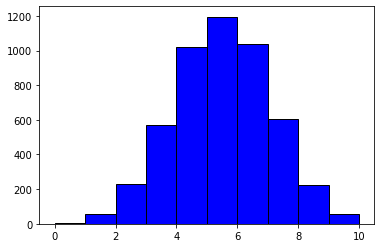

In [ ]:
np.random.seed(6)
final_tails = []

for x in range(5000) :
  tails = [0]
  
  for y in range(10) :
    toss = np.random.randint(0, 2)  # head: 0, tail: 1
    tails.append(tails[y] + toss)
  
  final_tails.append(tails[-1])

plt.hist(final_tails, bins=10, edgecolor = 'black', color='blue')
plt.show()

Going up/down steps according to 100 rolls of a dice and simulating 10 times.

[[  0   1   0 ...  82  83  84]
 [  0   1   6 ...  70  71  72]
 [  0   0   1 ...  95  99  98]
 ...
 [  0   4   5 ...  97  99 100]
 [  0   1   6 ...  92  93  94]
 [  0   1   6 ...  66  70  71]]


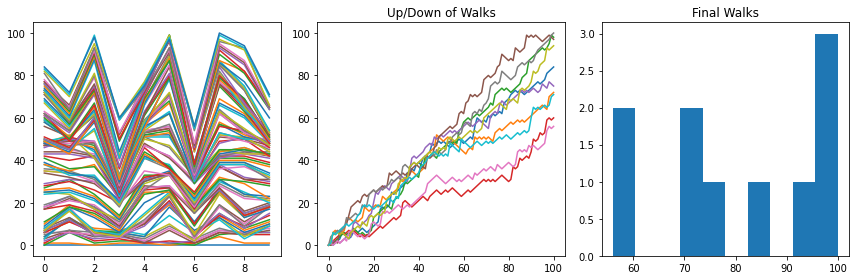

In [ ]:
np.random.seed(6)
all_walks = []
for i in range(10) :
  random_walk = [0]
  
  for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1, 7)
    if dice <= 2 :
      step = max(0, step - 1)
    elif dice <= 5 :
      step = step + 1
    else :
      step = step + np.random.randint(1, 7)
    random_walk.append(step)
  
  all_walks.append(random_walk) # try small numbers in ranges to see the result

all_walks_array = np.array(all_walks) # convert the list into an array
print(all_walks_array)

all_walks_array_t = np.transpose(all_walks_array) # to see the increase of walks

final_walks = all_walks_array[:, -1]

fig, axes = plt.subplots(1, 3, figsize=[12, 4])
axes[0].plot(all_walks_array)
axes[1].plot(all_walks_array_t)
axes[1].set_title('Up/Down of Walks')
axes[2].hist(final_walks)
axes[2].set_title('Final Walks')
fig.tight_layout()
plt.show()

# **Statistical Summaries**

In [ ]:
diamond = sns.load_dataset('diamonds')
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
percentiles_carat = np.percentile(diamond['depth'], (25, 50, 75)) # 25th, 50th, 75th percentiles
percentiles_carat

array([61. , 61.8, 62.5])

# **Empirical Cumulative Density Funciton**

CDF(x) = (number of samples <= x) / (number of samples)

[1/n, 2/n, ..., 1] is an unbiased estimator that will converge to the true CDF in the limit of infinite samples.

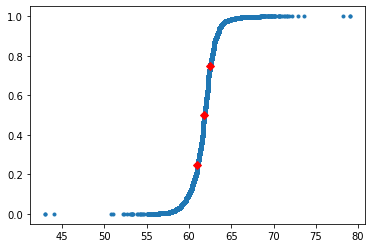

In [ ]:
x = np.sort(diamond['depth'])
y = np.arange(1, len(diamond)+1)/len(diamond)
plt.plot(x, y, marker='.', linestyle='none')  # plotting ECDF
plt.plot(percentiles_carat, (0.25, 0.5, 0.75), marker='D', color='red', linestyle='none') # plotting percentiles
plt.show()

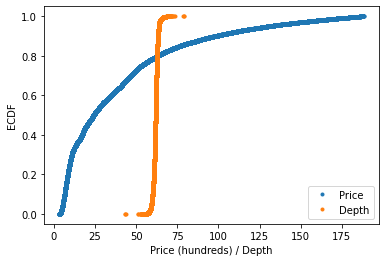

In [ ]:
x = np.sort(diamond['price']/100)
y = np.arange(1, len(diamond)+1)/len(diamond)
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(np.sort(diamond['depth']), y, marker='.', linestyle='none')
plt.xlabel('Price (hundreds) / Depth')
plt.ylabel('ECDF')
plt.legend(('Price', 'Depth'), loc='lower right') 
plt.show()

# **Distributions**
* Uniform distribution
* Binomial distribution - Bernoulli Trials
* Normal Distribution

Defining a Bernoulli function of n trials with success rate p

In [ ]:
def bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    # Initialize number of successes: successes
    successes = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to successes
        if random_number < p:
            successes += 1

    return successes

Obtaining an array of 1000 experiment results about the Bernoulli trials with success rate 1/12

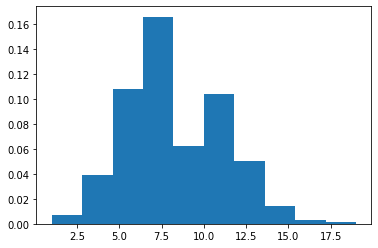

In [ ]:
np.random.seed(123)
bern_samples = np.empty(1000)

for i in range(1000):
  bern_samples[i] = bernoulli_trials(100, 1/12)

plt.hist(bern_samples, density=True) # showing densities of bars
plt.show()

Using Numpy Binomial Distribution to do the same as above

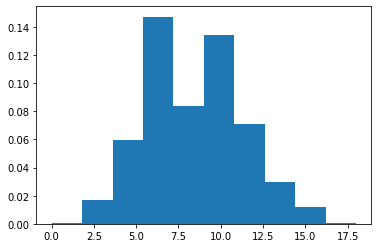

In [ ]:
np.random.seed(123)
bino_samples = np.random.binomial(100, 1/12, size=1000)
plt.hist(bino_samples, density=True)
plt.show()

Two candidates A and B are running for a political office in a town with 10,000 eligible voters. Assuming a null hypothesis model of the candidates having equal chances, generate a sample from the population.

In [ ]:
np.random.seed(12)
def bern(p):
  r = np.random.uniform(0,1)
  if r < p:
    return 0
  else:
    return 1

size = 10000
votes=[0, 0]

for i in range(size):
  vote = bern(0.5)
  votes[vote] += 1

print(votes)

[5052, 4948]


A poll conducted by a company found the outcome that 5,100 voters would choose candidate A. Assuming a null hypothesis model of the candidates having equal chances, i.e., no differences, what is the probability of getting results at least as extreme as the outcome from the poll?

In [ ]:
stats.binom_test(5100, n=10000, p=0.5, alternative='greater')

0.023292763852355285

In [ ]:
1 - stats.binom.cdf(5100, n=10000, p=0.5) # almost same as above

0.022212899522863205

**Poisson Distribution**

Poisson process: The timing of the next event is completely independent of when the previous event happened.  
One parameter: the average number of arrivals in a given length of time  
Poisson Distribution is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events. 

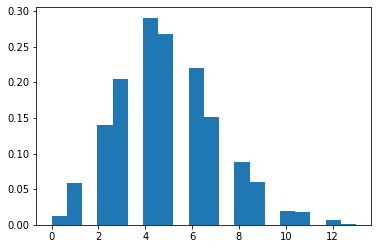

In [ ]:
np.random.seed(123)
pois_samples = np.random.poisson(5, size=1000)
plt.hist(pois_samples, bins=20, density=True)
plt.show()

**Normal distribution** of mean = 10, std = 3 using 1000 samples

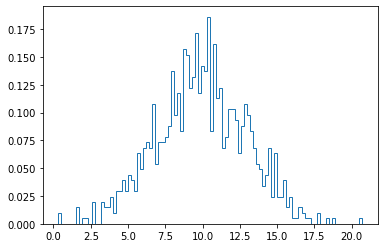

In [ ]:
np.random.seed(123)
normal_samples = np.random.normal(10, 3, size=1000)
plt.hist(normal_samples, bins=100, histtype='step', density=True)
plt.show()

# **Bootstrap Sampling and Confidence Interval**

Bootstrap sample means

In [ ]:
diamond_sample = diamond.sample(frac=0.1, random_state=99) # random_state: seed for random number generator
original_sample = diamond_sample['price']
means_boot_samples = []
np.random.seed(11)
for i in range(1000):
  boot_sample = np.random.choice(original_sample, 1000) # bootstrap sampling with replacement
  means_boot_samples.append(boot_sample.mean())

In [ ]:
original_sample.mean()

3930.6290322580644

Confidence interval

In [ ]:
conf_int = np.percentile(means_boot_samples, [2.5, 97.5]) # 95% confidence interval for the bootstrap distribution
conf_int

array([3680.554175, 4174.32185 ])

Shading the confidence interval on the histogram of the data

In [ ]:
means_boot_array = np.array(means_boot_samples)
means_conf = means_boot_array[(means_boot_array > conf_int[0]) & (means_boot_array < conf_int[1])]

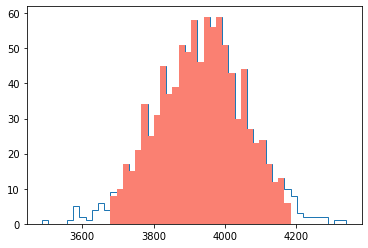

In [ ]:
bins = np.linspace(np.min(means_boot_array), np.max(means_boot_array), 50)

plt.hist(means_boot_array, bins=bins, histtype='step')
plt.hist(means_conf, bins=bins, color='salmon')
plt.show()

Confidence interval for t distribution

In [ ]:
# 95% confidence interval for the t distribution with standard error of means (sem)
stats.t.interval(alpha=0.95, df=999, loc=original_sample.mean(), scale=original_sample.sem()) 

(3824.63529071264, 4036.6227738034886)

# **Entropy**

Entropy is often interpreted as the degree of disorder or randomness in the system.

How many ways can I get 4 heads ("order") if I toss a fair coin 4 times? HHHH, only one way. Probabilty = 1/16  
How many ways can I get 2 heads and 2 tails ("disorder", "messy") if I toss to a fair coin 4 times? HHTT, HTHT, TTHH, THTH, HTTH, THHT, 6 ways. Probability = 6/16

There are more ways to have "disorder" than "order". The increase of entropy in the universe is statistical, i.e., disorder is more probable than order. It explains the arrow of time (past, present, future). Why do we grow old but not get younger? Why do we remember the past but not the future?

The quantity of information is the number of bits required to send a random event from a probability distribution. It is also considered to measure "Surprise". An event with high probability has less surprise, less entropy, less info, e.g., the Sun rose from the east this morning. An event with low probability surprises us; it has more info, more entropy, e.g., Breaking News: MC decided to ban all homework.

What is the entropy of this random variable? 1.75
Which probability distribution will result the maximum entropy? Better with a fair die (uniform distribution)

In [ ]:
p = [1/8,1/8,1/2,1/4] # a unfair die
# Entropy
H = stats.entropy(p, base=2)
H

1.75

In [ ]:
p = [1/4,1/4,1/4,1/4] # a fair die
H = stats.entropy(p, base=2)
H

2.0

In [ ]:
p=1/4
H = -sum([p * math.log2(p) for _ in range(4)])
H

2.0

# **Bayesian Approach**

Bayesians define probabilty as a quantification of a personal belief. They assign a probability to a hypothesis or to a population parameter or to events that are not repeatable or events that happened in the past.

The probability of a hypothesis is updated as soon as new evidence (data) comes in.

**Example:** One has three coins: The first coin has heads and tails with equal probability, the second one has two heads and the third one has two tails. He chose one of the coins randomly and tossed it. It landed heads up (**Event D**). What is the probability that he chose the first or the second or the third coin (**Event H**)?

We are competing hypotheses (explanations) as to which coin he chose.

Prior P(H): Choosing a choin

In [ ]:
# 0: fair coin HT
# 1: two heads coin HH
# 2: two tails coin TT
prior = np.array([1/3,1/3,1/3])

Likelihood P(D|H): The chose coin has landed heads/tails up

In [ ]:
# Likelihood for heads: P(heads|first coin)=1/2; P(heads|second coin)=1; P(heads|third coin)=0
likelihood_h = np.array([1/2,1,0])

# Likelihood for tails
likelihood_t = np.array([1/2,0,1])

Posterior P(H|D) =  Prior * Likelihood / P(D): Bayes' Formula

In [ ]:
# We observe heads H
# We update our probability for each hypothesis in light of the new evidence. Change your mind!
posterior = list([1/3,1/3,1/3]) # initial choice of a coin
for i in range(3):
    posterior[i] = prior[i] * likelihood_h[i] / np.sum(prior * likelihood_h)
print(posterior) 

[0.3333333333333333, 0.6666666666666666, 0.0]


In [ ]:
# We again observe heads H. The previous posterior is the new prior. Again we change our minds!
prior = posterior
for i in range(3):
    posterior[i] = prior[i] * likelihood_h[i] / np.sum(prior * likelihood_h)
print(posterior)

[0.2, 0.8695652173913043, 0.0]


In [ ]:
# We again observe heads H. The previous posterior is the new prior.
prior = posterior
for i in range(3):
    posterior[i] = prior[i] * likelihood_h[i] / np.sum(prior * likelihood_h)
print(posterior)

[0.1031390134529148, 0.9440152397079056, 0.0]


In [ ]:
# We again observe heads H. The previous posterior is the new prior.
prior = posterior
for i in range(3):
    posterior[i] = prior[i] * likelihood_h[i] / np.sum(prior * likelihood_h)
print(posterior)

[0.05179820895323177, 0.973297534331868, 0.0]


Now it looks like the first coin is improbable (p=0.05) and the second coin is almost certain (p=0.97). It is certainly not the third coin (p=0).

What happens if he tosses the coin one more time and it lands tails up?

In [ ]:
# Now, we observe tails T. The previous posterior is the new prior.
# Change the likelihood for tails
prior = posterior
for i in range(3):
    posterior[i] = prior[i] * likelihood_t[i] / np.sum(prior * likelihood_t)
print(posterior)

[1.0, 0.0, 0.0]


The improbable first coin with heads and tails must be the truth (p=1), since the others were eliminated as impossible (p=0).

Here is the wisdom of the detective Sherlock Holmes:  
When you have eliminated all which is impossible, whatever remains, however impossible, must be the truth.

**Example:** A medical lab test results positive for 99% of all sick people,i.e., P(test positive | sick person) = 0.99 (sensitivity).  
The lab test results negative for 98% of all healthy people, i.e., P(test negative | healthy person) = 0.98 (specificity).  
The disease prevalence in the population is 1 in 1000 persons, i.e., P(sick person) = 0.001.

If someone gets a positive result, what is the propability that the person has the disease, P(sick | positive)?

In [ ]:
prior = np.array([0.001, 0.999])  # sick, healthy

# Likelihood
likelihood_p = np.array([0.99, 0.02]) # test positive (true positive, false positive)
likelihood_n = np.array([0.01, 0.98]) # test negative (false negative, true negative)

# Observe positive test
posterior = list([0.001, 0.999])
for i in range(2):
    posterior[i] = prior[i] * likelihood_p[i] / np.sum(prior * likelihood_p)
print(posterior) 

[0.047210300429184546, 0.9527896995708154]


P(sick | positive) = 0.047

In [ ]:
# Observe positive test
posterior = list([0.001, 0.999])
for i in range(2):
    posterior[i] = prior[i] * likelihood_n[i] / np.sum(prior * likelihood_n)
print(posterior) 

[1.0214191597805993e-05, 0.9999897858084023]


P(sick | negative) = 0.00001

# **Hypothesis Tests**

Scipy Hypothesis Tests perform two-sided tests.

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [ ]:
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
mpg.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


**One Sample t-Test:** The one sample t-test determines whether the sample mean is statistically different from a known or hypothesised population mean. The one sample t-test is a parametric test.

Testing if the mean MPG is less than 24

In [ ]:
stats.ttest_1samp(mpg['mpg'], 24)

Ttest_1sampResult(statistic=-1.2390302429257336, pvalue=0.21606632320538086)

p-value is pvalue/2 which is 0.108 for a left tailed test.

p-value for a right tailed test

In [ ]:
stats.ttest_1samp(mpg['mpg'], 23)

Ttest_1sampResult(statistic=1.3134233631013956, pvalue=0.1897988921835813)

**Two Samples t-Test:** The independent samples t-test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The independent samples t-test is a parametric test. This test is also known as the independent t-test.

Testing if there is evidence that the mean MPGs between USA and Japan are different

In [ ]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
usa = mpg[mpg['origin']=='usa']
japan = mpg[mpg['origin']=='japan']
europe = mpg[mpg['origin']=='europe']

In [ ]:
stats.ttest_ind(usa['mpg'],japan['mpg'])

Ttest_indResult(statistic=-12.684336451971392, pvalue=3.0598199771888896e-30)

**Paired Samples t-Test:** The paired samples t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

In [ ]:
#stats.ttest_rel('before', 'after')
#stats.ttest_1samp('before' - 'after', 0)

**One-way ANOVA:** It tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

Testing if there is evidence that the 3 mean MPGs of the 3 countries differ

In [ ]:
stats.f_oneway(usa['mpg'],japan['mpg'], europe['mpg'])

F_onewayResult(statistic=98.54179491075871, pvalue=1.9154864184128e-35)

**Chi-Square Test:** The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.  

The following takes an array as input representing the contingency table observed for the two categorical variables. It returns the calculated statistic and p-value for interpretation as well as the calculated degrees of freedom and table of expected frequencies.

Testing if the variable 'cylinders' is associated with the variable 'origin'

In [ ]:
table = pd.crosstab(mpg['cylinders'], mpg['origin'], margins = False)

In [ ]:
stats.chi2_contingency(table)

(180.10177141976715,
 9.800693325588298e-35,
 8,
 array([[  0.70351759,   0.79396985,   2.50251256],
        [ 35.87939698,  40.49246231, 127.6281407 ],
        [  0.52763819,   0.59547739,   1.87688442],
        [ 14.77386935,  16.67336683,  52.55276382],
        [ 18.11557789,  20.44472362,  64.43969849]]))

**One Sample z-Test:** Compare the proportion in a sample to an expected value. alternative = [‘two-sided’, ‘smaller’, ‘larger’]

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#proportions_ztest(count=number of successes, nobs=sample size, value=null parameter, alternative='larger')

**Two Samples z-Test:** Compare the proportions between two samples

In [ ]:
#successes = np.array([sample1_success, sample2_success])
#samples = np.array([sample1_size, sample2_size])

#proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# **Example: Do Left-handed People Really Die Young?**

This example is a project in Datacamp.

A 1991 study reported that left-handed people die on average nine years earlier than right-handed people. Nine years! Could this really be true?


In [ ]:
lefthanded = pd.read_csv('lefthanded.csv')  # obtained in 1986

In [ ]:
lefthanded.isnull().sum()

Unnamed: 0    0
Age           0
Male          0
Female        0
dtype: int64

In [ ]:
lefthanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   Age         77 non-null     int64  
 2   Male        77 non-null     float64
 3   Female      77 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.5 KB


In [ ]:
# create a new column for birth year of each age
lefthanded['Birth_year'] = 1986 - lefthanded['Age']
# create a new column for the average of male and female
lefthanded['Mean'] = (lefthanded['Male'] + lefthanded['Female']) / 2

In [ ]:
lefthanded['Age'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86])

In [ ]:
lefthanded['Birth_year'].unique()

array([1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955,
       1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933,
       1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922,
       1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911,
       1910, 1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900])

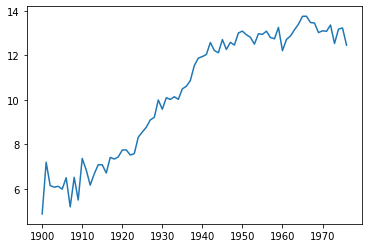

In [ ]:
plt.plot(lefthanded['Birth_year'], lefthanded['Mean'])
plt.show()

**Goal:** Using Bayes' formula, calculate the probability of dying at age A given that you're left-handed, that is, P(A | LH). Also need the same quantity for right-handers: P(A | RH).  

Note that P(A|LH)=P(LH|A)P(A) / P(LH).

**P(LH | A):** To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we'll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we'll pick 10 since the data looks flat-ish until about 1910.

In [ ]:
# create a function for P(LH | A)
def P_lh_given_A(death_ages, study_year):
  """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
  Inputs: numpy array of ages of death, study_year
  Returns: probability of left-handedness given that subjects died in `study_year` at ages `death_ages` 
  """
    
  # use the mean of the 10 last and 10 first points for left-handedness rates
  early_rate = lefthanded['Mean'][-10:-1].mean()
  late_rate = lefthanded['Mean'][0:10].mean()
  mid_rates = lefthanded.loc[lefthanded['Birth_year'].isin(study_year - death_ages)]['Mean']
  youngest_age = study_year - 1986 + 10 # the youngest age in the data is 10
  oldest_age = study_year - 1986 + 86 # the oldest age is 86
    
  P_return = np.zeros(death_ages.shape) # create an empty array to store the results
  # extract rate of left-handedness for people of ages 'death_ages'
  P_return[death_ages > oldest_age] = early_rate / 100
  P_return[death_ages < youngest_age] = late_rate / 100
  P_return[(death_ages <= oldest_age) & (death_ages >= youngest_age)] = mid_rates / 100
      
  return P_return

**P(A):** To estimate the probability of living to an age A, use data that gives the number of people who died in a given year and how old they were to create a distribution of ages of death. If we normalize the numbers to the total number of people who died, we can think of this data as a probability distribution that gives the probability of dying at age A. The data we'll use for this is from the entire US for the year 1999. The first column is the age, and the other columns are the number of people who died at that age.

In [ ]:
death_dist = pd.read_csv('death_dist.csv') # obtained in 1999
death_dist.isnull().sum()

Unnamed: 0    0
Age           0
Both Sexes    0
Male          5
Female        0
dtype: int64

In [ ]:
death_dist.dropna(subset=['Both Sexes'], inplace=True)
death_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  120 non-null    int64  
 1   Age         120 non-null    int64  
 2   Both Sexes  120 non-null    float64
 3   Male        115 non-null    float64
 4   Female      120 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.6 KB


Compute P(A) when A = 25

In [ ]:
def P_A(death_ages):
  """ Input is an numpy array
  Output is an numpy array of probabilities at ages of death
  """
  prob = death_dist['Both Sexes'][death_ages] / death_dist['Both Sexes'].sum()
  return prob

In [ ]:
P_A(np.arange(0,120,1))

0      1.168402e-02
1      8.318546e-04
2      5.754811e-04
3      4.374660e-04
4      3.504747e-04
           ...     
115    1.254683e-06
116    1.254683e-06
117    4.182275e-07
118    8.364551e-07
119    4.182275e-07
Name: Both Sexes, Length: 120, dtype: float64

Compute P(LH|A) for the ages in the data death_dist in the study year 1991

In [ ]:
P_lh_given_A(death_dist['Age'], 1991)

array([0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.13090615, 0.13090615, 0.13090615, 0.13090615, 0.13090615,
       0.124578  , 0.13231817, 0.1317876 , 0.12535093, 0.13364605,
       0.13081958, 0.13103212, 0.13023483, 0.13453279, 0.13476138,
       0.13758695, 0.13755217, 0.13401601, 0.13149261, 0.12868653,
       0.12717081, 0.12210316, 0.13257706, 0.12744987, 0.12802655,
       0.13086048, 0.12945637, 0.12969764, 0.125059  , 0.12811728,
       0.12925186, 0.13089713, 0.13005413, 0.12463253, 0.12584601,
       0.12266167, 0.12708746, 0.12119368, 0.12214977, 0.12579418,
       0.12039146, 0.11946389, 0.11876431, 0.11545791, 0.10867741,
       0.10607883, 0.10492997, 0.100238  , 0.10137892, 0.10019225,
       0.10095186, 0.09576935, 0.0999348 , 0.09214568, 0.09096888,
       0.08766035, 0.08550735, 0.08322044, 0.07580706, 0.07517361,
       0.07748125, 0.0774286 , 0.07433365, 0.07336605, 0.07412

**P(LH):** P(LH) is the probability that a person who died in the study year is left-handed. This is the average left-handedness in the population of deceased people, and calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. If N(A) is the number of people who died at age A given by the dataframe death_dist, then P(LH) = SUM(P(LH|A) N(A)) / SUM(N(A)) over death_ages A.

In [ ]:
def P_lh(study_year): # sum over P_lh for each age group
  """ Overall probability of being left-handed if you died in the study year
  Input: dataframe of death distribution data, study year
  Output: P(LH), a single floating point number 
  """
  
  # compute P(LH|A) N(A) and then add them
  p_list = P_lh_given_A(death_dist['Age'], study_year) * death_dist['Both Sexes']
  p = p_list.sum()
  # normalize to total number of people (sum of death_dist['Both Sexes'])
  return p / death_dist['Both Sexes'].sum()

In [ ]:
P_lh(1991)

0.07871342168121463

Putting it all together: dying while left-handed, P(A|LH)=P(LH|A)P(A) / P(LH) 

In [ ]:
def P_A_given_lh(death_ages, study_year):
  """ The overall probability of being a particular `age_of_death` given that the person is left-handed 
  """
  
  return P_lh_given_A(death_ages, study_year) * P_A(death_ages) / P_lh(study_year)

Putting it all together: dying while right-handed, P(A|LH)=P(LH|A)P(A) / P(LH) 

In [ ]:
def P_A_given_rh(death_ages, study_year):
  """ The overall probability of being a particular `age_of_death` given that you're right-handed 
  """
  return (1 - P_lh_given_A(death_ages, study_year)) * P_A(death_ages) / (1 - P_lh(study_year))

Check if the function are right. Note that the column 'Both Sexes' in the data 'death_dist' has 120 entries.

In [ ]:
ages = np.arange(0, 120, 1)
# among left- or riht-handers, calculate the probability of each age at death in 1991
A_among_LH = P_A_given_lh(ages, 1991)
A_among_RH = P_A_given_rh(ages, 1991)
A_among_LH.sum(), A_among_RH.sum()

(1.0, 1.0)

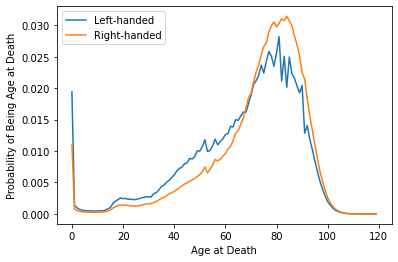

In [ ]:
fig, ax = plt.subplots()
ax.plot(ages, A_among_LH, label = "Left-handed")
ax.plot(ages, A_among_RH, label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at Death")
ax.set_ylabel(r"Probability of Being Age at Death")
plt.show()

Notice that the left-handed distribution has a bump below age 70; of the pool of deceased people, left-handed people are more likely to be younger.

Average age of left- or right-handed people at death

In [ ]:
avg_death_age_lh = (ages * A_among_LH).sum()
avg_death_age_rh = (ages * A_among_RH).sum()

# print the average ages for each group
print(round(avg_death_age_lh,1), round(avg_death_age_rh,1))

# print the difference between the average ages
print("The difference of average ages at death between right- and left-handers in the year 1991 is " 
      + str(round(avg_death_age_rh - avg_death_age_lh, 1)) + " years.")

67.3 72.8
The difference of average ages at death between right- and left-handers in the year 1991 is 5.5 years.


Our number is still less than the 9-year gap measured in the study. It's possible that some of the approximations we made are the cause:
* We used death distribution data from almost ten years after the study (1999 instead of 1991).
* we used death data from the entire United States instead of California alone (which was the original study).
* We extrapolated the left-handedness survey results to older and younger age groups, but it's possible our extrapolation wasn't close enough to the true rates for those ages.

The reported rates of left-handedness have increased from just 3% in the early 1900s to about 13.1% 2009 in USA, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers.

Do the same for the year 2020

In [ ]:
print("The difference of average ages at death between right- and left-handers in the year 2020 is " 
      + str(round((ages * P_A_given_rh(ages, 2020)).sum() - (ages * P_A_given_lh(ages, 2020)).sum(), 1)) 
      + " years.")

The difference of average ages at death between right- and left-handers in the year 2020 is 2.0 years.
